# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression

In [65]:
data = pd.read_csv('../lab_2/sklearn_dataset.csv') 

X = data[['x', 'y']].values
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(kernel='linear'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

In [67]:
def plot_decision_boundaries(X, y, model, ax):
    cmap_light = ListedColormap(['#1803fc', '#fc0f03'])
    cmap_bold = ListedColormap(['#fc03ca', '#03dffc'])
    
    h = .02 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cmap_light)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    ax.set_title(f"{model.__class__.__name__}")

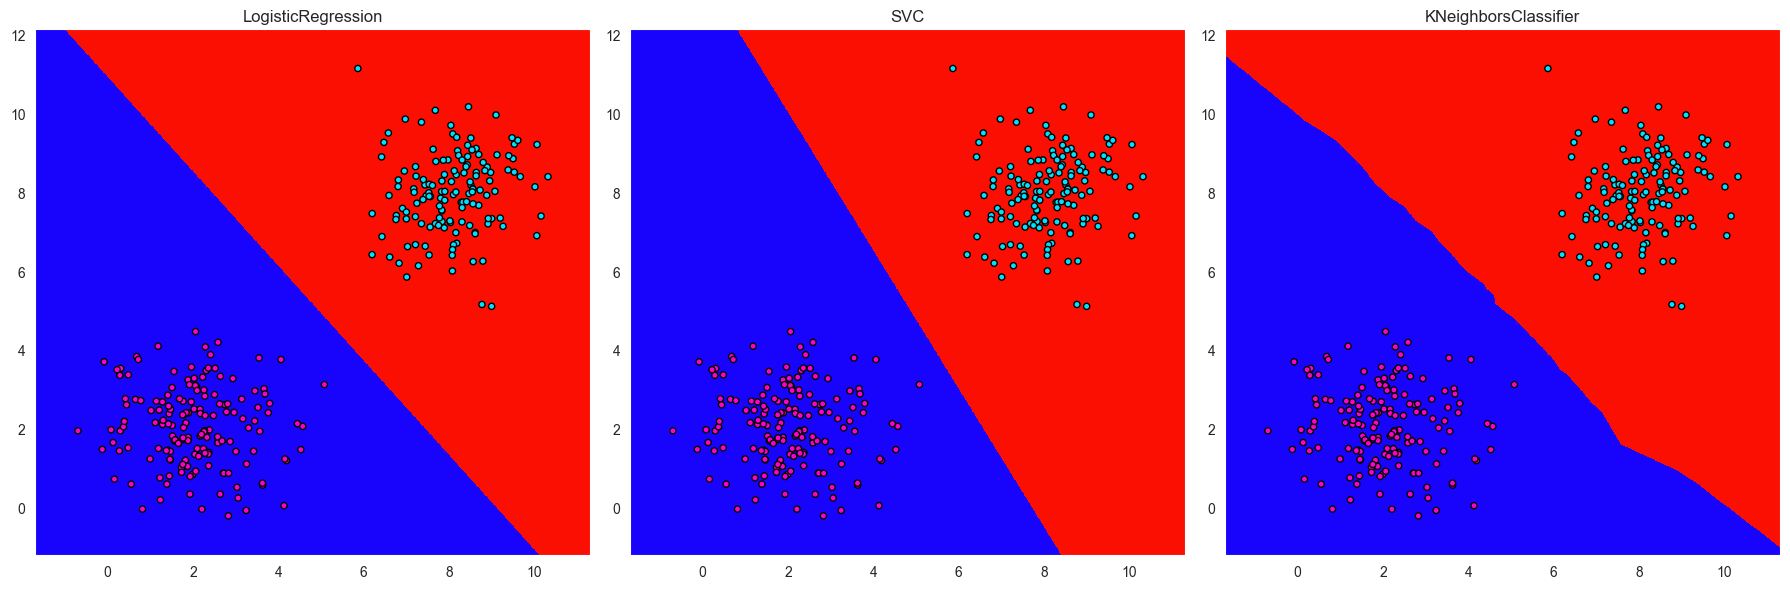

In [68]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
results = {}

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}
    plot_decision_boundaries(X_test, y_test, model, axs[idx])

plt.tight_layout()
plt.show()

In [69]:
results_df = pd.DataFrame(results).T
print(results_df)

                        Accuracy  Precision  Recall
Logistic Regression          1.0        1.0     1.0
Support Vector Machine       1.0        1.0     1.0
K-Nearest Neighbors          1.0        1.0     1.0


**Аналіз отриманих результатів**:

1.   За нашими результатами, моделі Logistic Regression та SVM показали дуже схожу продуктивность та точність на рівні (0.87), що показує  їх хорошу здатність лінійно класифікувати роздільні дані. 
2.   Модель k-NN показала трохи нижчі показники (0.84), що може бути пов'язано через чутливістю до кількості сусідів та нерегулярністю у даних. 
3.   Загалом можна сказати, що Logistic Regression та SVM є кращими для цього завдання через те що вони є більш ефективними на лінійно роздільних наборах даних.

**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [70]:
data = pd.read_csv('../lab_2/classes.csv') 

X = data[['x', 'y']].values
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

In [72]:
def plot_decision_boundaries_with_errors(X, y, model, ax):
    cmap_light = ListedColormap(['#1803fc', '#fc0f03', '#fc9403'])
    cmap_bold = ListedColormap(['#fc03ca', '#03dffc', '#03fc45'])
    
    h = .02 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cmap_light)
    
    y_pred = model.predict(X)
    misclassified = (y != y_pred) 
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    ax.scatter(X[misclassified, 0], X[misclassified, 1], facecolors='none', edgecolors='black', s=100, linewidths=2, label='Misclassified')
    
    ax.set_title(f"{model.__class__.__name__}")

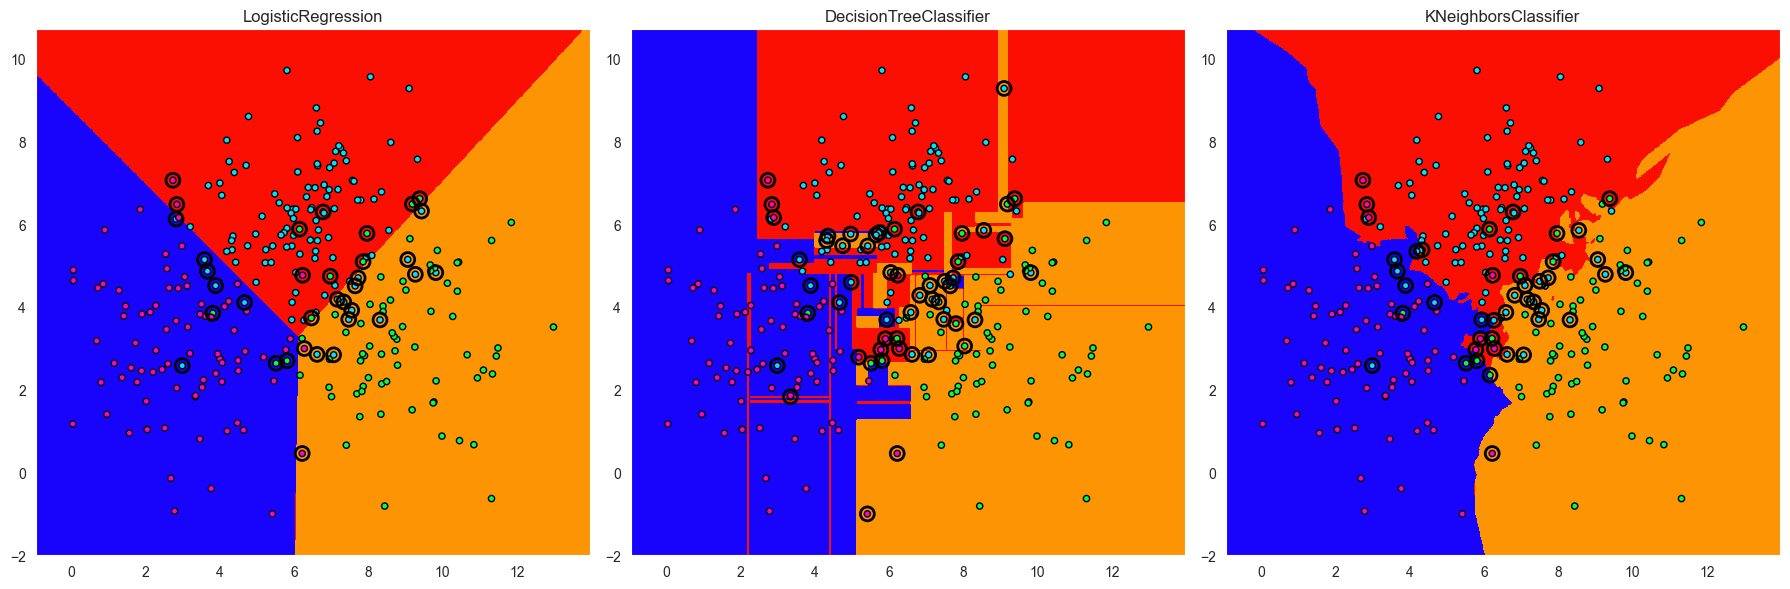

In [73]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
results = {}

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}
    
    plot_decision_boundaries_with_errors(X_test, y_test, model, axs[idx])

plt.tight_layout()
plt.show()


In [74]:
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall
Logistic Regression  0.870370   0.867419  0.874617
Decision Tree        0.803704   0.804189  0.811719
K-Nearest Neighbors  0.837037   0.834985  0.844551


**Аналіз отриманих результатів**:

1.   Проаналізувавши наші результати, можна сказати що модель Logistic Regression показала найвищу продуктивність з точністю 0.87. Порівняно з Decision Tree і k-NN, які трохи гірші з точністю 0.82 та 0.84. 
2.   Перекриття між нашими класами впливає на точність класифікації, тому що ці моделі мають проблеми з правильною класифікацією даних в областях. 
3.  Logistic Regression працює найкраще через свої можливості до розподілу даних за лінійними координатів, тоді як інші моделі можуть допускати більше помилок через складність геометрії координатів.

**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [75]:
data = pd.read_csv('../lab_2/torus_data.csv')

X = data[['x', 'y']].values
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF Kernel)": SVC(kernel='rbf')
}

In [77]:
def plot_decision_boundaries(X, y, model, ax):
    cmap_light = ListedColormap(['#1803fc', '#fc0f03'])
    cmap_bold = ListedColormap(['#fc03ca', '#03dffc'])
    
    h = .02  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cmap_light)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    ax.set_title(f"{model.__class__.__name__}")

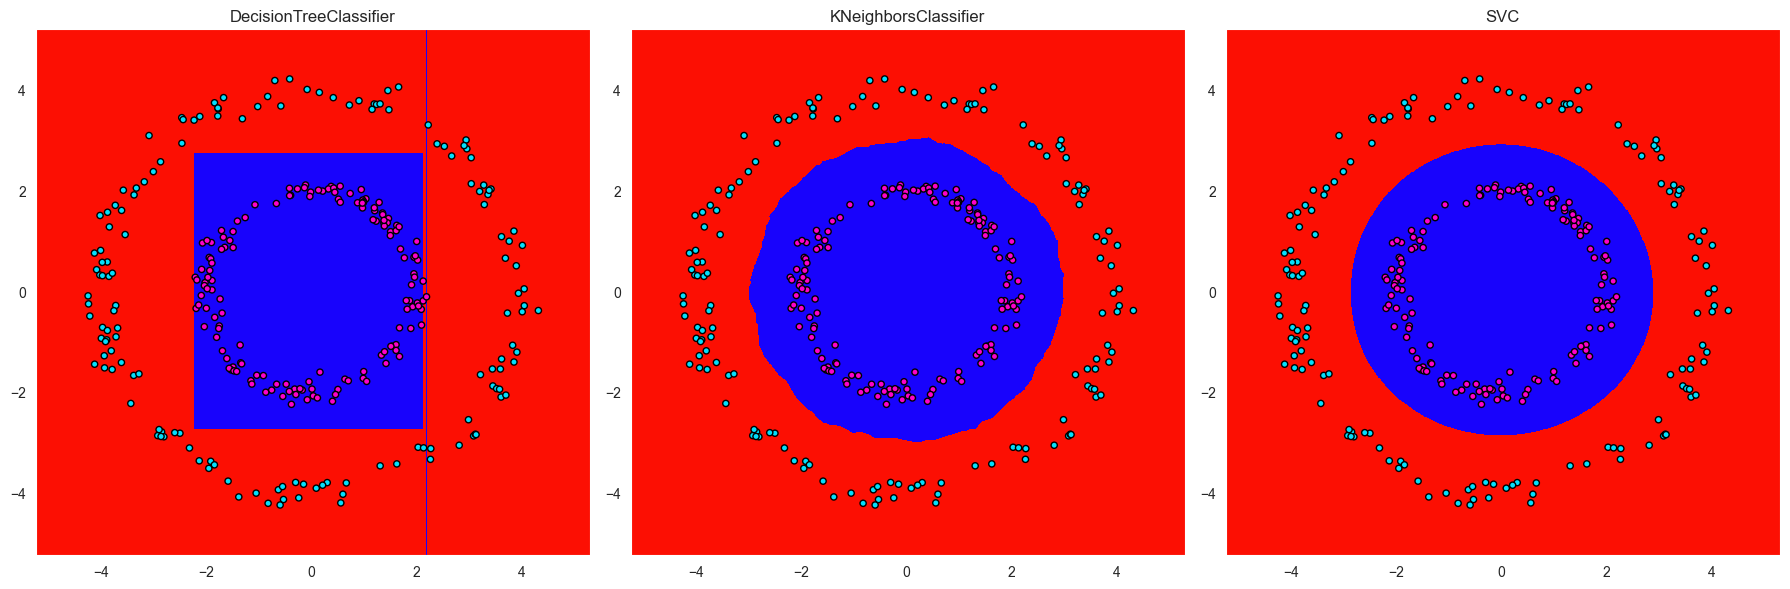

In [78]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
results = {}

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}
    plot_decision_boundaries(X_test, y_test, model, axs[idx])

plt.tight_layout()
plt.show()

In [79]:
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision  Recall
Decision Tree             1.0        1.0     1.0
K-Nearest Neighbors       1.0        1.0     1.0
SVM (RBF Kernel)          1.0        1.0     1.0


**Аналіз отриманих результатів**:

1. Проаналізувавши усі три моделі Decision Tree, k-NN та SVM з RBF ядром, вони показали 100% точність
2. Це свідчить про те що з такими параметрами вони можуть добре та правильно класифікувати дані. 
3. Модель SVM з RBF ядром найбільш підходить для обробки складної геометрії через свою можливість адаптуватися до нелінійних кордонів.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [80]:
data = pd.read_csv('../lab_2/spiral_data.csv')

X = data[['x', 'y']].values
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF Kernel)": SVC(kernel='rbf')
}

In [82]:
def plot_decision_boundaries(X, y, model, ax):
    cmap_light = ListedColormap(['#1803fc', '#fc0f03'])
    cmap_bold = ListedColormap(['#fc03ca', '#03dffc'])
    
    h = .02 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cmap_light)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    ax.set_title(f"{model.__class__.__name__}")

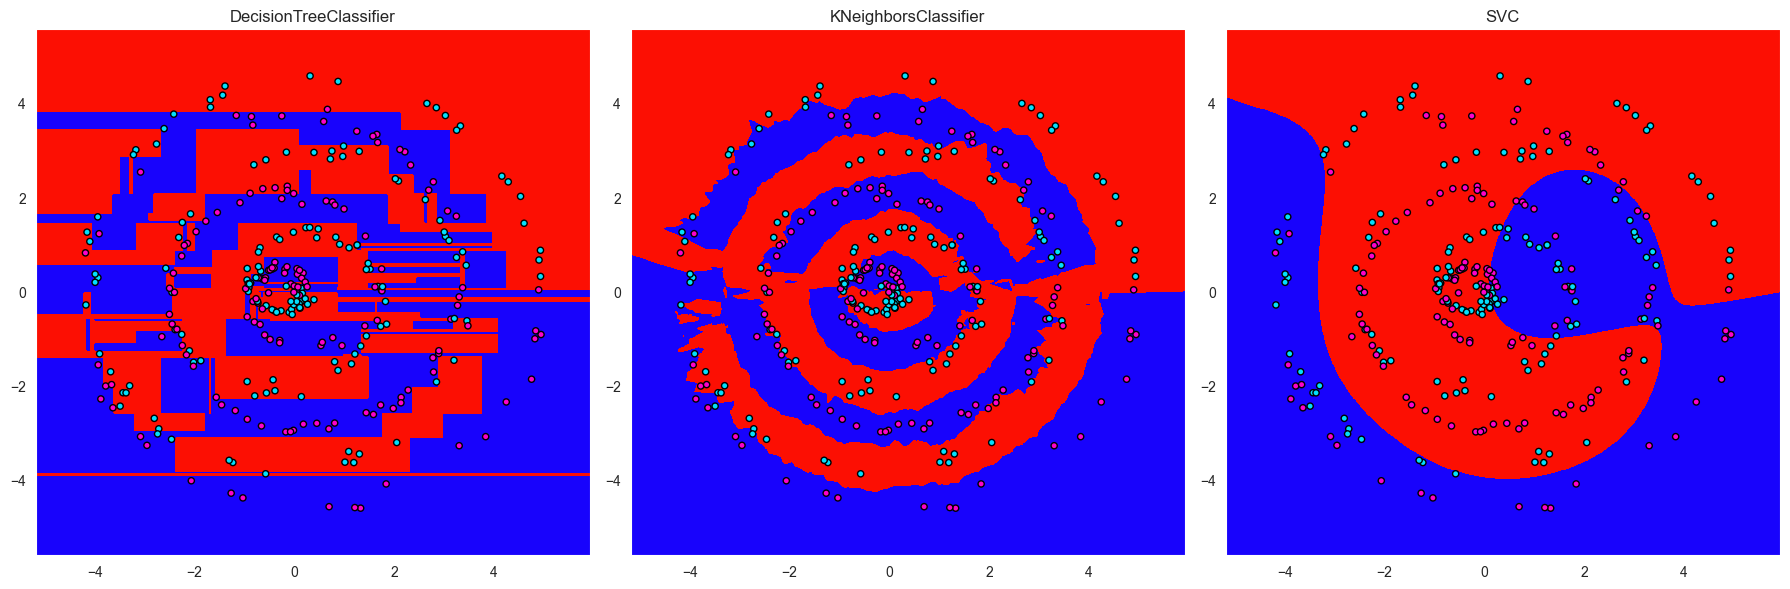

In [83]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
results = {}

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}
    plot_decision_boundaries(X_test, y_test, model, axs[idx])

plt.tight_layout()
plt.show()

In [84]:
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall
Decision Tree        0.786667   0.787946  0.786667
K-Nearest Neighbors  0.803333   0.803995  0.803333
SVM (RBF Kernel)     0.470000   0.466416  0.470000


**Аналіз отриманих результатів**:

1.   Після аналізу ми бачимо, що модель Decision Tree та k-NN показали дуже схожі результати з приблизною точністю (0.79-0.80), тоді як SVM з RBF ядром показує нижчу точність (0.47).
2.   Це доводить, що SVM має складність для робрти з нелінійним ядром в адаптації до спіральної структури даних.
3. Модель k-NN краще справляється через те що може враховувати локальні властивості даних. 